<a href="https://colab.research.google.com/github/Run-aivle/study/blob/main/March/03.13/SEN/DataAgumentaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import numpy as np
import matplotlib.pyplot as plt

In [14]:
!wget -O Loopy.webp https://1801889e95b1f9bf.kinxzone.com/webfile/product/7/7274/4g5v67m55hv2.jpg

--2023-03-14 10:56:30--  https://1801889e95b1f9bf.kinxzone.com/webfile/product/7/7274/4g5v67m55hv2.jpg
Resolving 1801889e95b1f9bf.kinxzone.com (1801889e95b1f9bf.kinxzone.com)... 18.64.174.114, 18.64.174.21, 18.64.174.41, ...
Connecting to 1801889e95b1f9bf.kinxzone.com (1801889e95b1f9bf.kinxzone.com)|18.64.174.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78244 (76K) [image/jpeg]
Saving to: ‘Loopy.webp’

Loopy.webp          100%[===================>]  76.41K  --.-KB/s    in 0.03s   

2023-03-14 10:56:30 (2.70 MB/s) - ‘Loopy.webp’ saved [78244/78244]



In [15]:
image_org = load_img("Loopy.webp")
image = img_to_array(image_org)
image.shape  # height, width, depth

(1000, 1000, 3)

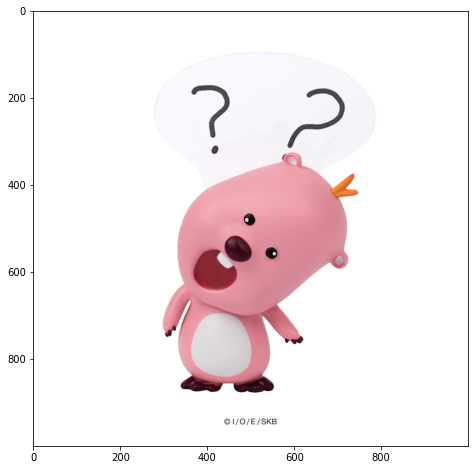

In [16]:
plt.figure(figsize=(12,8))
# plt.imshow(image)
plt.imshow(image/255)
plt.show()

In [17]:
image = np.expand_dims(image, axis=0) # 데이터 개수를 담당할 차원 추가
image.shape

(1, 1000, 1000, 3)

### ImageDataGeneration

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
aug = ImageDataGenerator(rotation_range=30,      # 이미지 회전
                         width_shift_range=0.1,  # 이미지 좌우 이동
                         height_shift_range=0.1, # 이미지 상하 이동
                         zoom_range=0.5,         # 확대/축소 범위
                         shear_range=0.5,        # 비스듬히 늘림
                        #  horizontal_flip=True,   # 가로 전환
                         vertical_flip=True,     # 세로 전환           
                         fill_mode='nearest')    # 마지막 옵션 주의하자. 이미지 회전, 이동, 축소할 때 발생하는 공간을 채우는 방식

In [20]:
imageGen = aug.flow(image, # 이미지 어레이를 받아서.
                    batch_size=1,
                    save_to_dir='output',
                    save_prefix='image',
                    save_format='jpg' )

In [21]:
!mkdir output

In [22]:
!ls output

In [23]:
total = 0

for image in imageGen:
    # 루프가 돌면서 이미지가 한장씩 생성된다.
    total += 1
    # 10장 채우면 멈추자
    if total == 20:
        break

In [24]:
!ls output

image_0_1233.jpg  image_0_3396.jpg  image_0_6789.jpg  image_0_7420.jpg
image_0_1935.jpg  image_0_4094.jpg  image_0_6949.jpg  image_0_7853.jpg
image_0_209.jpg   image_0_4775.jpg  image_0_701.jpg   image_0_8404.jpg
image_0_2680.jpg  image_0_4830.jpg  image_0_7127.jpg  image_0_869.jpg
image_0_2983.jpg  image_0_5358.jpg  image_0_7243.jpg  image_0_8861.jpg


In [25]:
import os

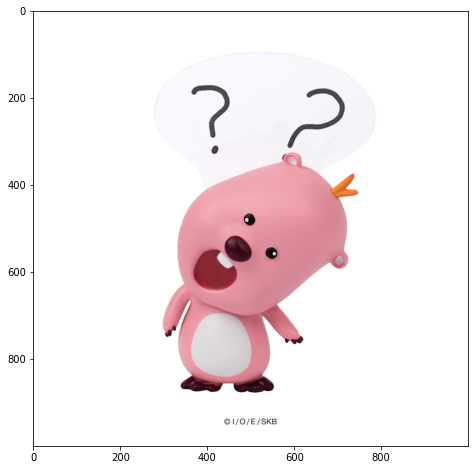

In [26]:
plt.figure(figsize=(12,8))
plt.imshow(image_org)
plt.show()

In [27]:
os.listdir('output')

['image_0_4830.jpg',
 'image_0_7127.jpg',
 'image_0_7853.jpg',
 'image_0_8861.jpg',
 'image_0_2680.jpg',
 'image_0_701.jpg',
 'image_0_6949.jpg',
 'image_0_5358.jpg',
 'image_0_1233.jpg',
 'image_0_869.jpg',
 'image_0_4094.jpg',
 'image_0_1935.jpg',
 'image_0_2983.jpg',
 'image_0_8404.jpg',
 'image_0_6789.jpg',
 'image_0_7243.jpg',
 'image_0_4775.jpg',
 'image_0_209.jpg',
 'image_0_3396.jpg',
 'image_0_7420.jpg']

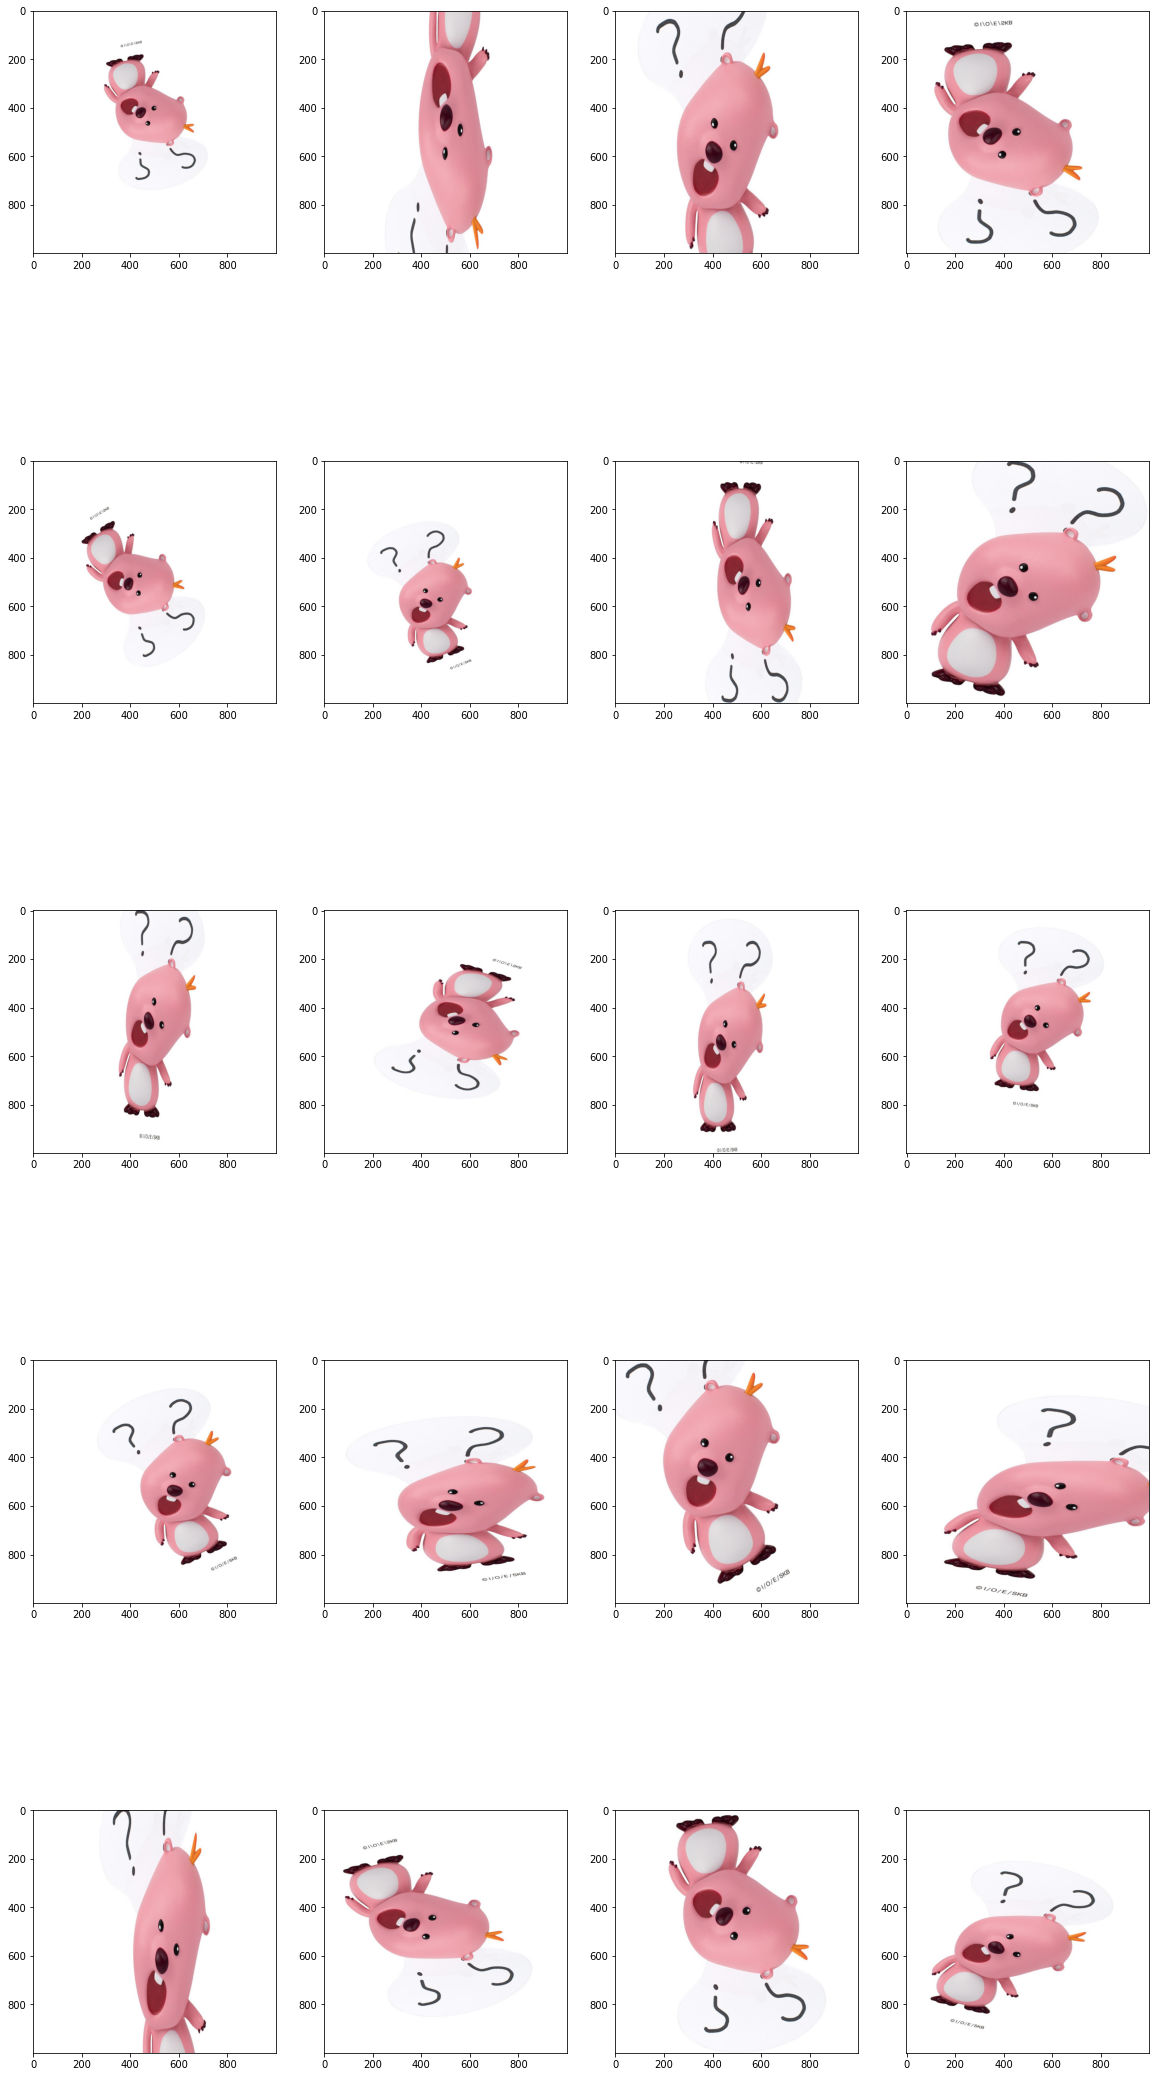

In [28]:
plt.figure(figsize=(20,40))
for i, each in enumerate(os.listdir('output')):
    filepath = './output/' + each

    img = plt.imread(filepath)
    plt.subplot(5, 4, i+1)
    plt.imshow(img)